In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Feature Engineering

In [3]:
df['Ticket_count'] = df.groupby('Ticket')['Ticket'].transform('count') # Ticket to Ticket count
df = df.drop(columns=['Ticket']) 
df = df.drop(columns=['PassengerId','Name']) #Removing PassengerID and Name
df['Age'].fillna(df['Age'].mean(), inplace=True) #Filling Missing values
df['Cabin'].fillna('Unknown', inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Ticket_count
0,0,3,male,22.000000,1,0,7.2500,Unknown,S,1
1,1,1,female,38.000000,1,0,71.2833,C85,C,1
2,1,3,female,26.000000,0,0,7.9250,Unknown,S,1
3,1,1,female,35.000000,1,0,53.1000,C123,S,2
4,0,3,male,35.000000,0,0,8.0500,Unknown,S,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Unknown,S,1
887,1,1,female,19.000000,0,0,30.0000,B42,S,1
888,0,3,female,29.699118,1,2,23.4500,Unknown,S,2
889,1,1,male,26.000000,0,0,30.0000,C148,C,1


## One Hot Encoding

In [4]:
def encode_and_concat(df, columns_to_encode):
    for column in columns_to_encode:
        dummies = pd.get_dummies(df[column], dtype=int, prefix=column)
        df = pd.concat([df, dummies], axis='columns')
        df = df.drop([column, dummies.columns[0]], axis='columns')
    return df

columns_to_encode = [
    'Sex',
    'Cabin',
    'Embarked',
]

df_encoded = encode_and_concat(df, columns_to_encode)
df_encoded

,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_count,Sex_male,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Cabin_Unknown,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,1,1,38.000000,1,0,71.2833,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,26.000000,0,0,7.9250,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,1,1,35.000000,1,0,53.1000,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
887,1,1,19.000000,0,0,30.0000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0,3,29.699118,1,2,23.4500,2,0,0,0,...,0,0,0,0,0,0,0,1,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the Dataset

In [5]:
# Define target and features
Y = df_encoded['Survived']  # Target variable
X = df_encoded.drop(columns=['Survived'])  # Features excluding 'Survived'

# Set the test size ratio
test_ratio = 0.2

# Shuffle the data
num_samples = X.shape[0]
indices = np.arange(num_samples)
np.random.shuffle(indices)

# Split indices
split_index = int(num_samples * (1 - test_ratio))
train_indices = indices[:split_index]
test_indices = indices[split_index:]

# Split the data
x_train, x_test = X.values[train_indices], X.values[test_indices]
y_train, y_test = Y.values[train_indices], Y.values[test_indices]

# Reshape y_train and y_test to column vectors if necessary
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Check the shapes
print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (712, 156)
Shape of X_test: (179, 156)
Shape of Y_train: (712, 1)
Shape of Y_test: (179, 1)


## Feature Scaling (Z Score)

In [6]:
# Standardization for X
X_train_mean = x_train.mean(axis=0)
X_train_std = x_train.std(axis=0)

# Avoid division by zero in case of zero standard deviation
X_train_std = np.where(X_train_std == 0, 1, X_train_std)

# Standardize training data
x_train_standardized = (x_train - X_train_mean) / X_train_std

# Standardize test data using training parameters
x_test_standardized = (x_test - X_train_mean) / X_train_std

# Ensure correct shapes
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Check the shapes
print("Shape of X_train_standardized:", x_train_standardized.shape)
print("Shape of X_test_standardized:", x_test_standardized.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train_standardized: (712, 156)
Shape of X_test_standardized: (179, 156)
Shape of Y_train: (712, 1)
Shape of Y_test: (179, 1)


## Performing PCA

In [7]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # Covariance matrix
        cov = np.cov(X.T)

        # Eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # Eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # Sort eigenvectors by eigenvalues in descending order
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        # Store the top n_components eigenvectors
        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        # Project data using the trained components
        X = X - self.mean
        return np.dot(X, self.components.T)


# Assume x_train, x_test, y_train, and y_test are already defined
# Apply PCA on the training set
pca = PCA(n_components=7)
pca.fit(x_train)

# Transform both training and testing sets
x_train_projected = pca.transform(x_train)
x_test_projected = pca.transform(x_test)

# Print shapes to verify
print("Shape of X_train_projected:", x_train_projected.shape)
print("Shape of X_test_projected:", x_test_projected.shape)

Shape of X_train_projected: (712, 7)
Shape of X_test_projected: (179, 7)


## Implementing a Support Vector Machine (SVM) (Dataset with PCA)

SVM classification accuracy: 0.1005586592178771


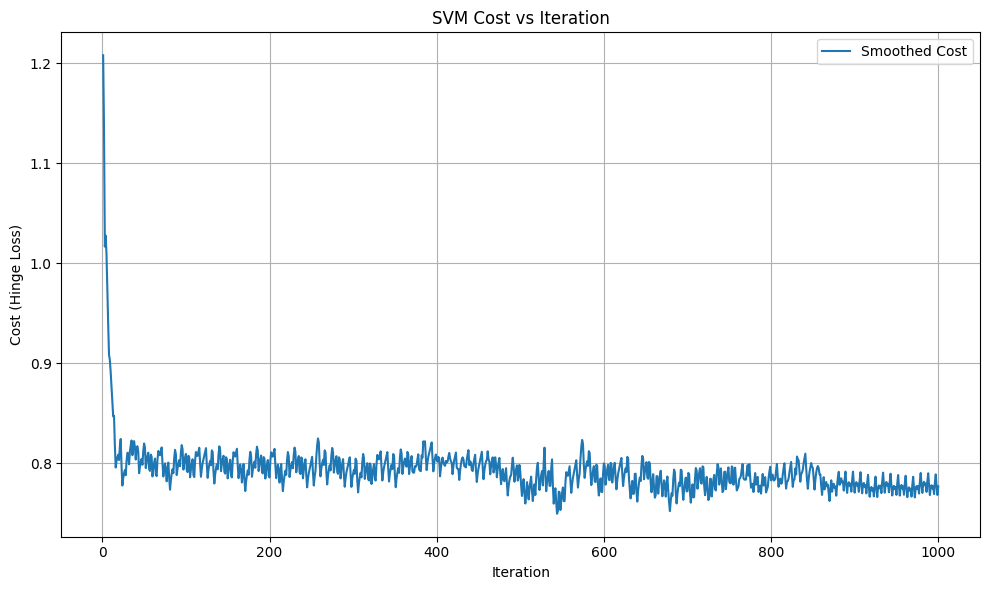

In [12]:
class SVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.cost_history = []  # To store cost at each iteration
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        # Convert labels to +1 and -1
        y_ = np.where(y <= 0, -1, 1)
        
        # Initialize weights and bias - use real part if complex
        self.w = np.real(np.zeros(n_features, dtype=complex))
        self.b = 0
        
        for iteration in range(self.n_iters):
            total_cost = 0
            for idx, x_i in enumerate(X):
                # Take real part of dot product
                x_i_real = np.real(x_i)
                w_real = np.real(self.w)
                
                # Condition uses + self.b and real parts
                condition = y_[idx] * (np.dot(x_i_real, w_real) + self.b) >= 1
                
                if condition:
                    # Regularization update when correctly classified
                    self.w -= self.lr * (2 * self.lambda_param * w_real)
                else:
                    # Update weights and bias when misclassified
                    gradient_real = 2 * self.lambda_param * w_real - y_[idx] * x_i_real
                    self.w -= self.lr * gradient_real
                    self.b -= self.lr * y_[idx]
                
                # Compute hinge loss (uses real parts)
                cost = max(0, 1 - y_[idx] * (np.dot(x_i_real, w_real) + self.b))
                total_cost += cost
            
            # Store the average cost for this iteration
            self.cost_history.append(total_cost / n_samples)
        
        return self
    
    def predict(self, X):
        # Use real parts for prediction
        x_real = np.real(X)
        w_real = np.real(self.w)
        
        # Decision function uses real parts
        approx = np.dot(x_real, w_real) + self.b
        return np.sign(approx)

def accuracy(y_true, y_pred):
    # Ensure both are 1D arrays and flatten if necessary
    y_true_flat = np.array(y_true).flatten()
    y_pred_flat = np.array(y_pred).flatten()
    
    # Ensure y_pred uses the same label encoding as y_true
    if np.unique(y_true_flat).size == 2:
        y_pred_flat = np.where(y_pred_flat <= 0, -1, 1)
    
    return np.mean(y_true_flat == y_pred_flat)

def plot_cost(cost_history):
    # Smooth out the cost history for better visualization
    smoothed_window = 10
    smoothed_cost = [
        np.mean(cost_history[max(0, i-smoothed_window):i+1]) 
        for i in range(len(cost_history))
    ]
    
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(smoothed_cost) + 1), smoothed_cost, label="Smoothed Cost")
    plt.xlabel("Iteration")
    plt.ylabel("Cost (Hinge Loss)")
    plt.title("SVM Cost vs Iteration")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Training and evaluation
clf = SVM(learning_rate=0.0001, lambda_param=0.0001, n_iters=1000)
y_train_flat = y_train.flatten()  # Ensure y_train is 1D
clf.fit(x_train_projected, y_train_flat)
predictions = clf.predict(x_test_projected)

print("SVM classification accuracy:", accuracy(y_test, predictions))

# Plot Cost vs Iteration
plot_cost(clf.cost_history)

## Implementing a Support Vector Machine (SVM) (Dataset without PCA)

SVM classification accuracy: 0.27932960893854747


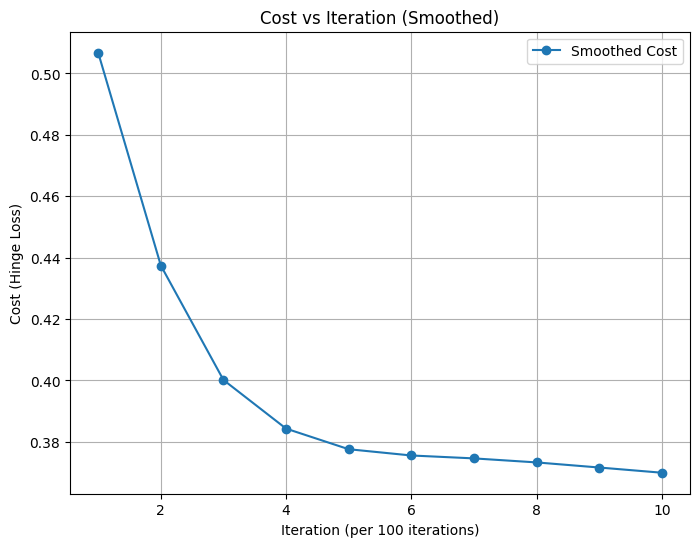

In [9]:
class SVM:

    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.cost_history = []  # To store cost at each iteration

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Convert labels to +1 and -1
        y_ = np.where(y <= 0, -1, 1)

        # Initialize weights and bias
        self.w = np.zeros(n_features, dtype=float)
        self.b = 0

        for iteration in range(self.n_iters):
            total_cost = 0
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    gradient = 2 * self.lambda_param * self.w - y_[idx] * x_i
                    self.w -= self.lr * np.real(gradient)
                    self.b -= self.lr * y_[idx]

                # Compute hinge loss for the current sample
                cost = max(0, 1 - y_[idx] * (np.dot(x_i, self.w) - self.b))
                total_cost += cost
    
            # Store the average cost for this iteration
            self.cost_history.append(total_cost / n_samples)

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

# Testing
clf = SVM(learning_rate=0.0001, lambda_param=0.0001, n_iters=1000)
y_train_flat = y_train.flatten()  # Ensure y_train is 1D
clf.fit(x_train, y_train_flat)
predictions = clf.predict(x_test)

def accuracy(y_true, y_pred):
    return np.sum(y_true.flatten() == y_pred) / len(y_true)

print("SVM classification accuracy:", accuracy(y_test, predictions))

# Plot Cost vs Iteration
def plot_cost(cost_history):
    smoothed_cost = [
        np.mean(cost_history[i:i + 100]) for i in range(0, len(cost_history), 100)
    ]
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(smoothed_cost) + 1), smoothed_cost, label="Smoothed Cost", marker="o")
    plt.xlabel("Iteration (per 100 iterations)")
    plt.ylabel("Cost (Hinge Loss)")
    plt.title("Cost vs Iteration (Smoothed)")
    plt.grid(True)
    plt.legend()
    plt.show()

plot_cost(clf.cost_history)

## Implementing a Logistic Regression (Dataset with PCA)

Training the model...
Iteration 0, Cost: 0.670791-0.000000j
Iteration 1000, Cost: 0.613744-0.000000j
Iteration 2000, Cost: 0.612787-0.000000j
Iteration 3000, Cost: 0.612624-0.000000j
Iteration 4000, Cost: 0.612471-0.000000j
Iteration 5000, Cost: 0.612320-0.000000j
Iteration 6000, Cost: 0.612170-0.000000j
Iteration 7000, Cost: 0.612023-0.000000j
Iteration 8000, Cost: 0.611877-0.000000j
Iteration 9000, Cost: 0.611733-0.000000j


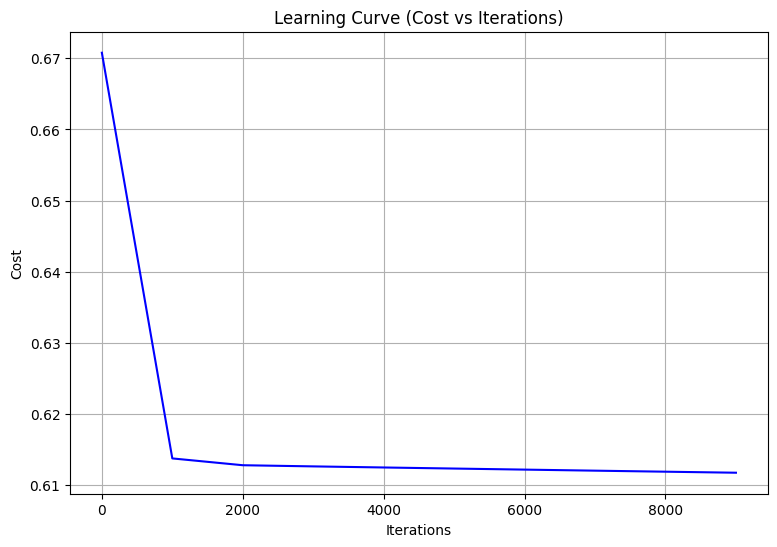

Accuracy: 63.69%
Precision: 0.50


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Stable sigmoid function
def sigmoid(z):
    # Clip values to avoid overflow
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

def compute_cost(X, y, weights, bias):
    m = len(y)
    # Forward propagation
    z = np.dot(X, weights) + bias
    h = sigmoid(z)
    
    # Compute cost with numerical stability
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Initialize parameters
n_features = x_train_projected.shape[1]
weights = np.zeros((n_features, 1), dtype=complex)
bias = 0.0
learning_rate = 0.001  # Reduced learning rate
n_iterations = 10000
cost_history = []

# Training with gradient descent
print("Training the model...")
for i in range(n_iterations):
    # Forward propagation
    z = np.dot(x_train_projected, weights) + bias
    predictions = sigmoid(z)
    
    # Compute gradients
    dw = (1/len(y_train)) * np.dot(np.conj(x_train_projected.T), (predictions - y_train))
    db = np.mean(np.real(predictions - y_train))
    
    # Update parameters
    weights -= learning_rate * np.real(dw)
    bias -= learning_rate * db
    
    # Calculate and store cost every 1000 iterations
    if i % 1000 == 0:
        cost = compute_cost(x_train_projected, y_train, weights, bias)
        cost_history.append(cost)
        print(f"Iteration {i}, Cost: {cost:.6f}")

# Plotting the learning curve
plt.figure(figsize=(9, 6))
plt.plot(range(0, n_iterations, 1000), cost_history, 'b-')
plt.title('Learning Curve (Cost vs Iterations)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Prediction function
def predict(x, weights, threshold=0.5):
    return (sigmoid(np.dot(x, np.real(weights))) >= threshold).astype(int)

# Evaluate the model on test data
y_pred = predict(x_test_projected, weights)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")

calculate_metrics(y_test, y_pred)

## Implementing a Logistic Regression (Dataset without PCA)

Training the model...
Iteration 0, Cost: 0.690915
Iteration 1000, Cost: 0.622083
Iteration 2000, Cost: 0.617853
Iteration 3000, Cost: 0.614170
Iteration 4000, Cost: 0.610938
Iteration 5000, Cost: 0.608077
Iteration 6000, Cost: 0.605523
Iteration 7000, Cost: 0.603221
Iteration 8000, Cost: 0.601128
Iteration 9000, Cost: 0.599210


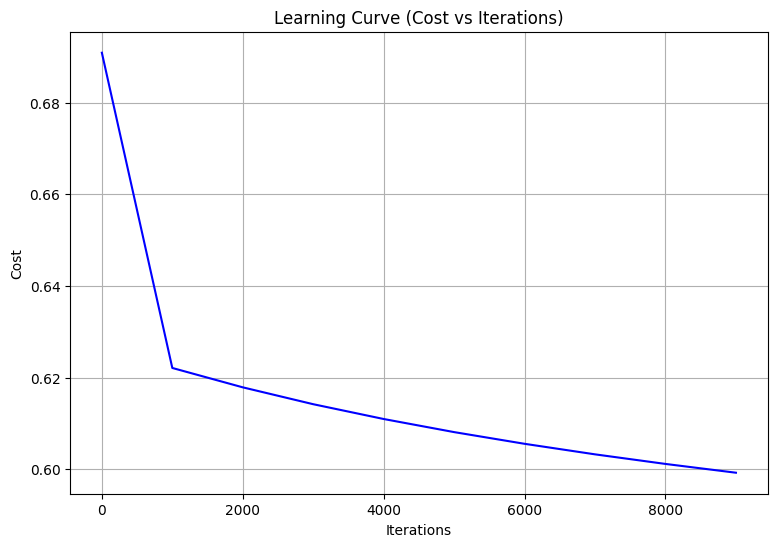

Accuracy: 68.16%
Precision: 0.67


In [11]:
# Stable sigmoid function
def sigmoid(z):
    # Clip values to avoid overflow
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

def compute_cost(X, y, weights, bias):
    m = len(y)
    # Forward propagation
    z = np.dot(X, weights) + bias
    h = sigmoid(z)
    
    # Compute cost with numerical stability
    epsilon = 1e-15
    h = np.clip(h, epsilon, 1 - epsilon)
    cost = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost
# Initialize parameters
n_features = x_train.shape[1]
weights = np.zeros((n_features, 1))
bias = 0
learning_rate = 0.0001  # Reduced learning rate
n_iterations = 10000
cost_history = []
# Training with gradient descent
print("Training the model...")
for i in range(n_iterations):
    # Forward propagation
    z = np.dot(x_train, weights) + bias
    predictions = sigmoid(z)
    
    # Compute gradients
    dw = (1/len(y_train)) * np.dot(x_train.T, (predictions - y_train))
    db = np.mean(predictions - y_train)
    
    # Update parameters
    weights -= learning_rate * dw
    bias -= learning_rate * db
    
    # Calculate and store cost every 100 iterations
    if i % 1000 == 0:
        cost = compute_cost(x_train, y_train, weights, bias)
        cost_history.append(cost)
        if i % 1000 == 0:
            print(f"Iteration {i}, Cost: {cost:.6f}")
plt.figure(figsize=(9, 6))
plt.plot(range(0, n_iterations, 1000), cost_history, 'b-')
plt.title('Learning Curve (Cost vs Iterations)')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Prediction function
def predict(x, weights, threshold=0.5):
    return (sigmoid(np.dot(x, np.real(weights))) >= threshold).astype(int)

# Evaluate the model on test data
y_pred = predict(x_test, weights)

# Calculate evaluation metrics
def calculate_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")

calculate_metrics(y_test, y_pred)